In [1]:
#Import Libraries

import numpy as np
from keras import backend as K
from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from datetime import datetime

In [2]:
train_data_path ='C:\\Users\\sazid\\Desktop\\jour_data\\snake_background_CNN1\\train'
valid_data_path = 'C:\\Users\\sazid\\Desktop\\jour_data\\snake_background_CNN1\\valid'
test_data_path = 'C:\\Users\\sazid\\Desktop\\jour_data\\snake_background_CNN1\\test'

In [3]:
# Set image size, batch size, sample number and epochs

img_rows = 150
img_cols = 150
epochs = 100
batch_size = 32
num_of_train_samples = 2506 
num_of_valid_samples = 500


############################################
# Set Data Generator for training, testing and validataion.
# Note for testing, set shuffle = false (For proper Confusion matrix)

 # This will do preprocessing and realtime data augmentation:
 # this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=15, # randomly rotate images in the range 
                                                      # (degrees, 0 to 40)
                                   width_shift_range=0.1, # randomly shift images horizontally 
                                                          # (fraction of total width)
                                   height_shift_range=0.1,# randomly shift images vertically 
                                                          # (fraction of total height)
                                   shear_range=10, #shear_range is for randomly applying shearing transformations
                                   zoom_range=0.15, #randomly zooming inside pictures
                                   horizontal_flip=True, # randomly flip images
                                   fill_mode='nearest')

# batches of augmented image data
train_generator = train_datagen.flow_from_directory(train_data_path, # this is the target directory
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
valid_datagen = ImageDataGenerator(rescale=1. / 255)
                                                    
# this is a similar generator, for validation data
validation_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        class_mode='categorical')
                                                        
 # this is a similar generator, for test data                                                       
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')

Found 2506 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
#Model Creation / Sequential

model = Sequential()

model.add(Conv2D((32), (3, 3), input_shape=(img_rows, img_cols, 3), kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D((32), (3, 3),kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D((64), (3, 3),kernel_initializer="glorot_uniform"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vector

model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.20))


model.add(Dense(2))
model.add(Activation('softmax'))

#Get summary of the model
model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

#Train the model

history=model.fit(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_valid_samples // batch_size)
                    
#You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:
                    
model.save("snake.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        1

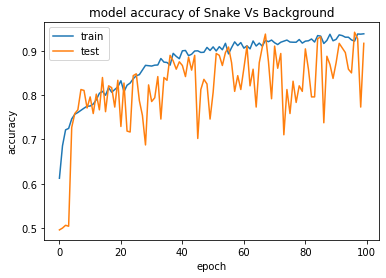

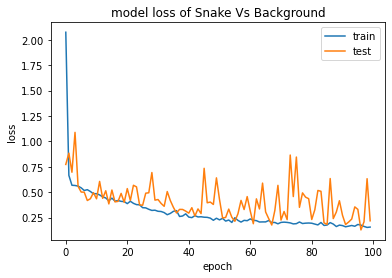

In [5]:
#Plot the Graph

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy Curves
plt.figure(1)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy of Snake Vs Background')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('acc7.png')
plt.show()

# loss Curves
plt.figure(2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss of Snake Vs Background')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('loss7.png')
plt.show()

In [6]:
#Print the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
    
print(target_names)

['background', 'snake']


Confusion matrix, without normalization


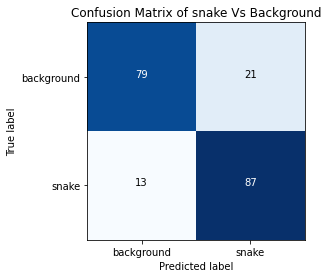

In [7]:
#Get the accuracy score
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix of all four class', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.figure(figsize=(8,8))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   

#thresh = cm.max() / 2.
#Matplotlib’s matshow
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(3)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix of snake Vs Background')
#print(cm)
plt.savefig('lizard.png')
plt.show()


In [8]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  background       0.86      0.79      0.82       100
       snake       0.81      0.87      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

